<a href="https://colab.research.google.com/github/mmarin11/Colabfiles/blob/main/Practica8/Practica8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga y exploración del dataset

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

# Estilo y contexto (todo desde Seaborn)
sns.set_theme(style="whitegrid", context="talk")

# 2) Cargar dataset
df = sns.load_dataset('tips')

# 3) Exploración básica
print("=== Primeras filas (head) ===")
display(df.head())

print("\n=== Información general (info) ===")
df.info()

print("\n=== Descriptivos (describe) ===")
display(df.describe(include='all').T)

print("\n=== Valores nulos por columna ===")
display(df.isna().sum())


=== Primeras filas (head) ===


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



=== Información general (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

=== Descriptivos (describe) ===


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0



=== Valores nulos por columna ===


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# Mapa de calor

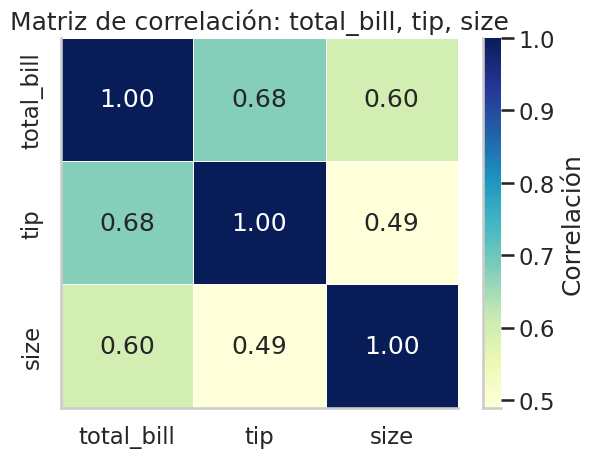

In [9]:
num_cols = ['total_bill', 'tip', 'size']
corr = df[num_cols].corr()

ax = sns.heatmap(
    corr,
    annot=True, fmt=".2f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={"label": "Correlación"}
)
ax.set_title("Matriz de correlación: total_bill, tip, size")
ax.set_xlabel("")
ax.set_ylabel("")
sns.despine()

# Diagrama de violín

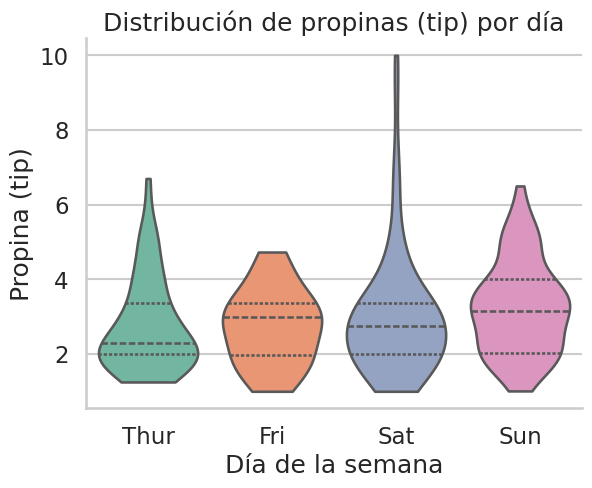

In [10]:
ax = sns.violinplot(
    data=df,
    x='day', y='tip',
    hue='day',
    legend=False,
    inner='quartile',
    palette='Set2',
    cut=0
)
ax.set_title("Distribución de propinas (tip) por día")
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Propina (tip)")
sns.despine()

# Gráfico de dispersión

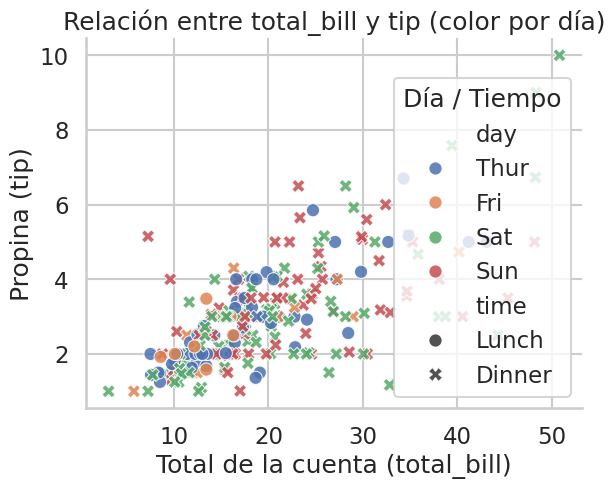

In [11]:
ax = sns.scatterplot(
    data=df,
    x='total_bill', y='tip',
    hue='day',
    style='time',
    s=90, alpha=0.85
)
ax.set_title("Relación entre total_bill y tip (color por día)")
ax.set_xlabel("Total de la cuenta (total_bill)")
ax.set_ylabel("Propina (tip)")
ax.legend(title="Día / Tiempo")
sns.despine()

# Gráfico de barras

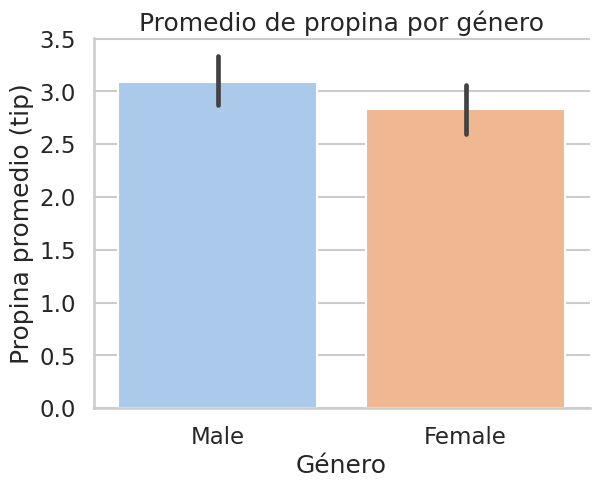

In [16]:
ax = sns.barplot(
    data=df,
    x='sex', y='tip',
    hue='sex',        # <- mismo valor que x
    legend=False,     # <- evita leyenda duplicada
    estimator=np.mean,
    errorbar=('ci', 95),
    palette='pastel'
)
ax.set_title("Promedio de propina por género")
ax.set_xlabel("Género")
ax.set_ylabel("Propina promedio (tip)")
sns.despine()

